In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [161]:
# unnormalized real distribution : N(z|-1, 1) + N(z|3, 1) * 1.5
def p_tilde(z):
    return norm.pdf(z + 1) + norm.pdf(z - 3) * 1.5

# proposal distribution q(z) = N(0, 4^2)
def q(z):
    return norm.pdf(z, 0, 4)

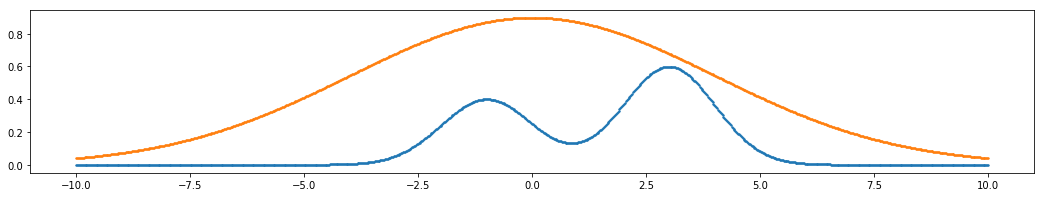

In [162]:
Z = np.linspace(-10, 10, 1000)
p_Z = pdf(Z)

k = 9
# comparison function kq(z)
kq_Z = k * q(Z)

plt.figure(figsize=[18, 3])
plt.scatter(Z, p_Z, s=2)
plt.scatter(Z, kq_Z, s=2)
plt.show()

In [166]:
# the number of samples
N = 10000

samples = []
for _ in range(N):
    # sample from N(0, 4^2)
    z0 = norm.rvs(size=1)[0] * 4
    kq_z0 = k * q(z0)
    
    # sample from Uniform(0, k * q(z0))
    u0 = np.random.uniform(low=0.0, high=kq_z0)
    
    if u0 < pdf(z0): # accept
        samples.append(z0)
    else: # reject
        pass

    

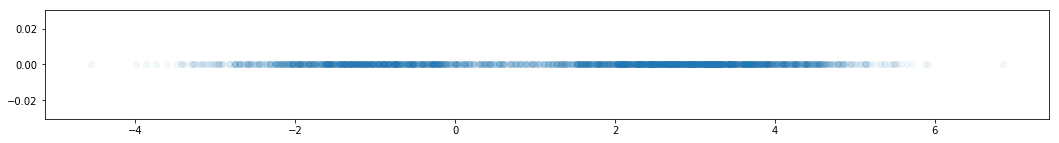

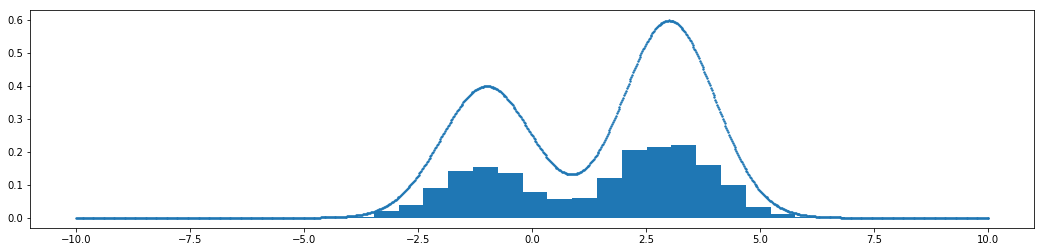

In [167]:
plt.figure(figsize=[18, 2])
plt.scatter(samples, np.zeros_like(samples), alpha=0.05)
plt.show()

hist, bin_edges = np.histogram(samples, bins=100, range=[-10, 10], normed=True, density=True)
plt.figure(figsize=[18, 4])
plt.hist(samples, bins='auto', density=True)  # arguments are passed to np.histogram
plt.scatter(Z, p_Z, s=2)
plt.show()